##### 정리
- 2019.06.12 : 해야할 것.
- 1) 우선 각 범주별로 Rating과 비교해서 특징 파악,,
- 나의 계획,, 범주형 변수가 들어가있는 것~ 우선적으로 Rating을 보고 로지스틱회귀분석 진행해보자
- 그러면 Rating 높은 것들을 대상으로 Feature을 뽑아내보자
- 이떄 중요한 것은 현재 Rating에 NUll값이 존재 --> 이것을 Test로 놓자
- 나머지 데이터 가지고 Valadition한다음에 test로 실험 -> 예측값이 존재할 터, 
- 그것이랑 AutoML이랑 비교!! 가장 나은 것 도출!!

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [86]:
import autogluon as ag
from autogluon import TabularPrediction as task

## 데이터 설명
- app이름 / 카테고리 / 평가점수 / 리뷰수 / app크기 / 다운로드수 / 유료구분 /가격 / 이용가능연령구분 / 장르 / 마지막 업데이트 /버전/ 안드로이드 버전

- 데이터를 다양한 측면에서 탐색적 분석
- app 평가점수 (rating)에 영향을 미치는 요소 분석 및 예측 모형 개발 등

##### 해야할 일
1. EDA ( 다양한 측면으로 분석해보자)
    - 구분 및 인사이트 도출
2. 예측 모형 한번 개발해보자
    - 다소 데이터가 없지만 그래도 위에서 Feature Engineering해보자

In [87]:
Data = pd.read_csv("data/app_store.csv",encoding = "UTF-8")

In [88]:
Data.shape

(10841, 13)

In [89]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [90]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [91]:
Data.columns = ["app이름","카테고리","평가점수","리뷰수","app크기","다운로드수","유료구분","가격","이용가능연령구분","장르","마지막업데이트","버전","안드로이드버전"]

In [92]:
Data.head()

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### 데이터 탐색 시작

In [93]:
Data.리뷰수.apply(lambda x : str(x))

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: 리뷰수, Length: 10841, dtype: object

In [94]:
Data[Data.리뷰수 == '3.0M']

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [163]:
data_test

array([1.9, 19.0, '3.0M', '1,000+', 'Free', '0', 'Everyone', nan,
       'February 11, 2018', '1.0.19', '4.0 and up'], dtype=object)

In [96]:
data_test[0] = 1.9

In [97]:
def Modify(data):
    data.iloc[10472,2:] = data_test
    data.iloc[10472,1] = "PHOTOGRAPHY"
    data.iloc[10472,-4] = "Photography"
    return data

##### 정규표현식 검색
- 현재 잘못 처리된 것 데이터의 카테고리가 무엇인지 한번 확인해봐서 고쳐보자
- 알아낸 것 : App이름과 장르가 유사 --> 그래도 한 가지 카테고리에 다양한 장르가 있으니까 나중에 이를 참고!

In [98]:
import re

In [99]:
temp_data = Data.app이름.values

In [100]:
match = []

In [101]:
for i in temp_data:
    match.append(re.search(r'[Pp]hoto',i))

In [102]:
match

[<re.Match object; span=(0, 5), match='Photo'>,
 None,
 None,
 None,
 None,
 None,
 <re.Match object; span=(13, 18), match='Photo'>,
 None,
 None,
 None,
 <re.Match object; span=(8, 13), match='Photo'>,
 <re.Match object; span=(9, 14), match='Photo'>,
 <re.Match object; span=(18, 23), match='Photo'>,
 None,
 None,
 None,
 <re.Match object; span=(0, 5), match='Photo'>,
 None,
 None,
 None,
 None,
 <re.Match object; span=(5, 10), match='Photo'>,
 None,
 None,
 None,
 None,
 None,
 <re.Match object; span=(9, 14), match='Photo'>,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 <re.Match object; span=(11, 16), match='Photo'>,
 <re.Match object; span=(20, 25), match='photo'>,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

In [103]:
list_index = []

In [104]:
# Photo가 들어있는 카테고리 index추출
for i in enumerate(match):
    if i[1] is None:
        pass
    else:
        list_index.append(i[0])

In [105]:
Temp_data2 = Data.iloc[list_index,:]

In [106]:
Temp_data2.카테고리.value_counts()

PHOTOGRAPHY            144
ART_AND_DESIGN          11
VIDEO_PLAYERS            6
TOOLS                    6
FAMILY                   5
BEAUTY                   4
PERSONALIZATION          4
SOCIAL                   3
HEALTH_AND_FITNESS       2
EVENTS                   2
PRODUCTIVITY             1
BOOKS_AND_REFERENCE      1
LIFESTYLE                1
DATING                   1
SHOPPING                 1
HOUSE_AND_HOME           1
PARENTING                1
COMICS                   1
1.9                      1
Name: 카테고리, dtype: int64

In [107]:
Temp_data2.장르.value_counts()

Photography                144
Art & Design                11
Tools                        6
Video Players & Editors      6
Personalization              4
Entertainment                4
Beauty                       4
Social                       3
Events                       2
Health & Fitness             2
Parenting                    1
Comics                       1
Lifestyle                    1
Dating                       1
Puzzle                       1
Productivity                 1
Books & Reference            1
Shopping                     1
February 11, 2018            1
House & Home                 1
Name: 장르, dtype: int64

##### 검증결과
- 장르는 Photography, 카테코리도 PHOTOGRAPHY로 결정
- 왜냐하면 유사한 App이름을 가진 장르, 카테고리 중 Top1차지한 이름을 가지고 왔기 떄문

In [164]:
Modify(Data).iloc[10472,:] # 확인 완료

app이름       Life Made WI-Fi Touchscreen Photo Frame
카테고리                                    PHOTOGRAPHY
평가점수                                            1.9
리뷰수                                              19
app크기                                          3.0M
다운로드수                                        1,000+
유료구분                                           Free
가격                                                0
이용가능연령구분                                   Everyone
장르                                      Photography
마지막업데이트                           February 11, 2018
버전                                           1.0.19
안드로이드버전                                  4.0 and up
Name: 10472, dtype: object

In [109]:
# 수정된 것 갱신
Data = Modify(Data)

## 데이터 갱신 한 것가지고 분석 시작

In [110]:
Data.head()

,app이름,카테고리,평가점수,리뷰수,app크기,다운로드수,유료구분,가격,이용가능연령구분,장르,마지막업데이트,버전,안드로이드버전
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [111]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
app이름       10841 non-null object
카테고리        10841 non-null object
평가점수        9367 non-null float64
리뷰수         10841 non-null object
app크기       10841 non-null object
다운로드수       10841 non-null object
유료구분        10840 non-null object
가격          10841 non-null object
이용가능연령구분    10841 non-null object
장르          10841 non-null object
마지막업데이트     10841 non-null object
버전          10833 non-null object
안드로이드버전     10839 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [112]:
Data.isnull().sum()

app이름          0
카테고리           0
평가점수        1474
리뷰수            0
app크기          0
다운로드수          0
유료구분           1
가격             0
이용가능연령구분       0
장르             0
마지막업데이트        0
버전             8
안드로이드버전        2
dtype: int64

In [113]:
Data.shape

(10841, 13)

In [114]:
10841 - 1474

9367

##### 평가점수 분포 확인

In [125]:
Rating_data = Data.평가점수.dropna()

In [126]:
Rating_data

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: 평가점수, Length: 9367, dtype: float64

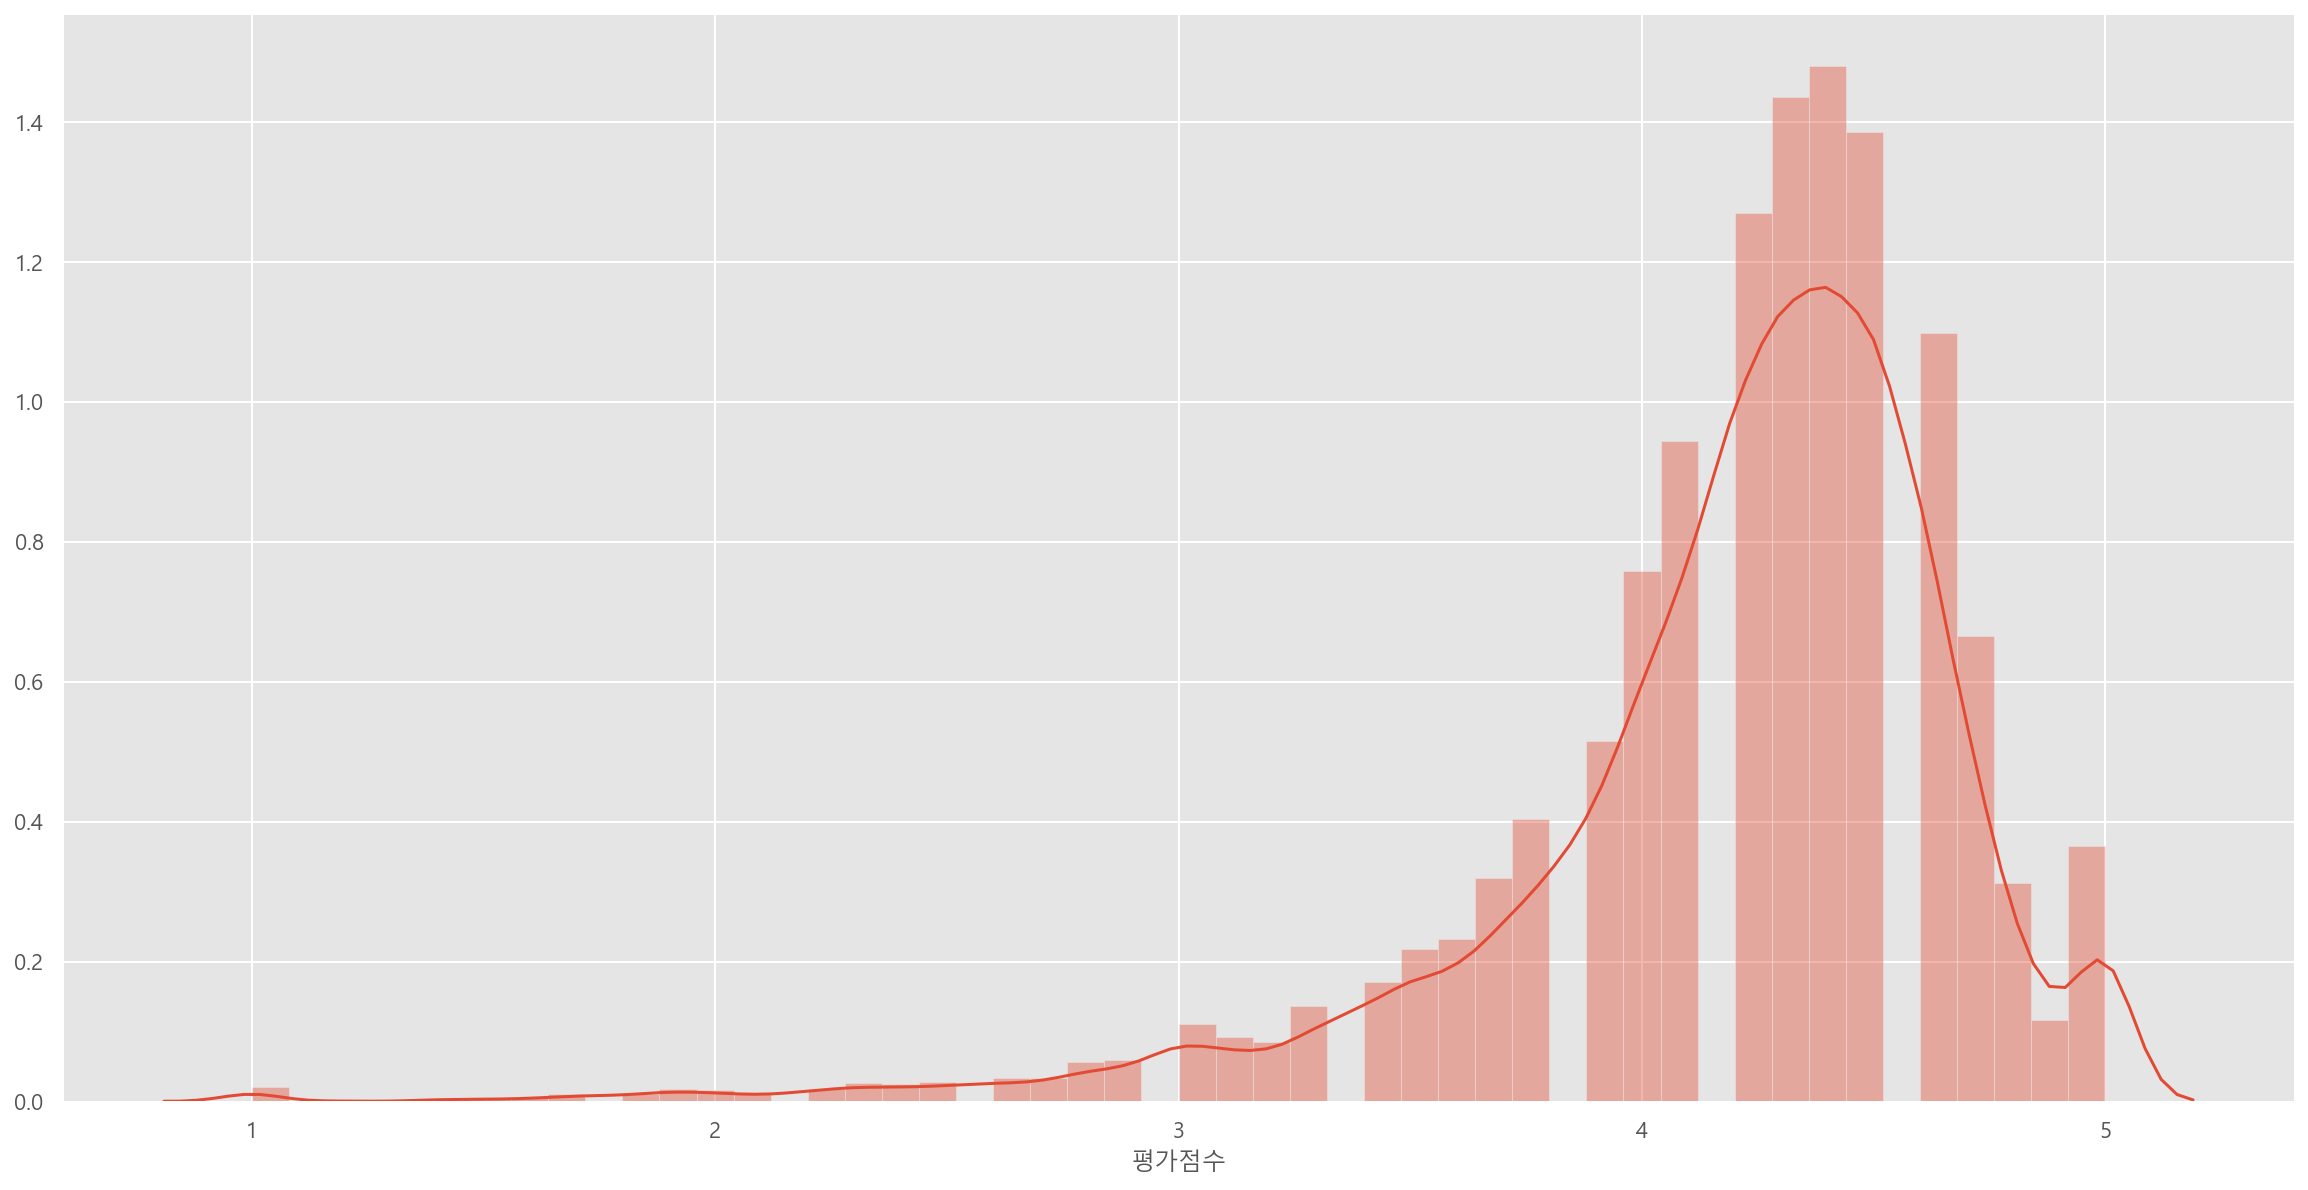

In [127]:
plt.figure(figsize = (20,10))
sns.distplot(Rating_data)

평가점수는 4~5점 사이에 많이 분포해있다.

##### 다운로드수 봐보자 ~ 인기!!

In [148]:
Download_data = Data.다운로드수

In [149]:
Download_data.shape

(10841,)

In [154]:
Download_data.apply(lambda x : x.replace(",",""))
Download_data = Download_data.apply(lambda x : x.replace("+",""))

In [159]:
Download_data = Download_data.apply(lambda x : x.replace(",",""))

In [162]:
Download_data.apply(lambda x : int(x))

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: 다운로드수, Length: 10841, dtype: int64

##### AutoML한번 해보자
- 시간이 없는 관계로

In [36]:
Dataset = task.Dataset(file_path = 'data/app_store.csv')

Loaded data from: data/app_store.csv | Columns = 13 / 13 | Rows = 10841 -> 10841


In [ ]:
predictor = task.fit(train_data = Dataset,label = 'Rating',output_directory = 'data/')

Beginning AutoGluon training ...
AutoGluon will save models to data/\
Train Data Rows:    10841
Train Data Columns: 13
Preprocessing data ...
Here are the first 10 unique label values in your data:  [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2]
AutoGluon infers your prediction problem is: regression  (because dtype of label-column == float and label-values can't be converted to int).
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: [('binary', 'multiclass', 'regression')])

NumExpr defaulting to 4 threads.
Feature Generator processed 9367 data points with 112 features
Original Features:
	object features: 12
Generated Features:
	int features: 100
All Features:
	object features: 12
	int features: 100
	Data preprocessing and feature engineering runtime = 12.92s ...
AutoGluon will gauge predictive performance using evaluation metric: root_mean_squared_error
To change this, specify the eval_metric argument of fit()
AutoGluon will

In [ ]:
results = predictor.fit_summary()

In [46]:
lboard = predictor.leaderboard()
lboard.sort_values(by = 'score_val', ascending = 'False')

                      model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer
0   weighted_ensemble_k0_l1  -0.461952       1.040731  224.178229                0.003988           0.797575            1       True
1   LightGBMRegressorCustom  -0.474853       0.220158    9.018402                0.220158           9.018402            0       True
2         CatboostRegressor  -0.475722       0.108079   40.682899                0.108079          40.682899            0       True
3    ExtraTreesRegressorMSE  -0.481132       0.148108   28.274081                0.148108          28.274081            0       True
4  RandomForestRegressorMSE  -0.484570       0.173125   30.099378                0.173125          30.099378            0       True
5        NeuralNetRegressor  -0.489278       0.560398  145.405271                0.560398         145.405271            0       True
6         LightGBMRegressor  -0.490016       0.057041    1.871328    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer
8,KNeighborsRegressorDist,-0.613041,0.301216,0.276195,0.301216,0.276195,0,True
7,KNeighborsRegressorUnif,-0.584892,0.289206,0.287204,0.289206,0.287204,0,True
6,LightGBMRegressor,-0.490016,0.057041,1.871328,0.057041,1.871328,0,True
5,NeuralNetRegressor,-0.489278,0.560398,145.405271,0.560398,145.405271,0,True
4,RandomForestRegressorMSE,-0.484570,0.173125,30.099378,0.173125,30.099378,0,True
3,ExtraTreesRegressorMSE,-0.481132,0.148108,28.274081,0.148108,28.274081,0,True
2,CatboostRegressor,-0.475722,0.108079,40.682899,0.108079,40.682899,0,True
1,LightGBMRegressorCustom,-0.474853,0.220158,9.018402,0.220158,9.018402,0,True
0,weighted_ensemble_k0_l1,-0.461952,1.040731,224.178229,0.003988,0.797575,1,True
